# Sample size effect in the estimation of PI

Written by: Eduardo Tapia

### 1] Estimate PI via Montecarlo (quarter unit circle)

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt

# Number of times the experiment for a certain sample size is performed
repetitions = 500

# Sample sizes to compute
# ... [10, 20, .., 100, 200, ..., 1000, 2000]
size = [10]
for i in range(1,37):
    size += [size[i-1] + 10**math.floor(np.log10(size[i-1]))]

# Create mx to store results
abs_error = np.zeros([len(size), repetitions])

# Set up iterations
for i in range(len(size)):
    print("Computing for N = "+str(size[i]))
    for j in range(repetitions):
        
        # Generate random numbers
        N = size[i]
        series = np.random.rand(2,N)

        # Determine how many points fall within quarter-circle
        pi = ((series**2).sum(axis=0) <= 1).astype(int).sum()*4/N

        # Computes the absolute error between estimated and numpy-called PI
        abs_error[i,j] = abs(np.pi-pi)/np.pi
        
print("Done!")

Computing for N = 10
Computing for N = 20
Computing for N = 30
Computing for N = 40
Computing for N = 50
Computing for N = 60
Computing for N = 70
Computing for N = 80
Computing for N = 90
Computing for N = 100
Computing for N = 200
Computing for N = 300
Computing for N = 400
Computing for N = 500
Computing for N = 600
Computing for N = 700
Computing for N = 800
Computing for N = 900
Computing for N = 1000
Computing for N = 2000
Computing for N = 3000
Computing for N = 4000
Computing for N = 5000
Computing for N = 6000
Computing for N = 7000
Computing for N = 8000
Computing for N = 9000
Computing for N = 10000
Computing for N = 20000
Computing for N = 30000
Computing for N = 40000
Computing for N = 50000
Computing for N = 60000
Computing for N = 70000
Computing for N = 80000
Computing for N = 90000
Computing for N = 100000
Done!


### 2] Plot estimation accuracy

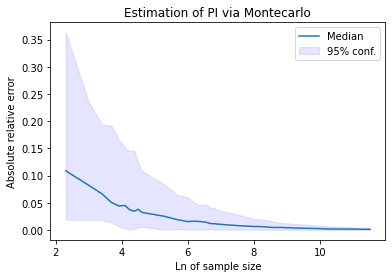

In [4]:
# Plot
plt.plot(np.log(size), np.percentile(abs_error, 50, axis=1))
plt.fill_between(np.log(size), np.percentile(abs_error, 2.5, axis=1), np.percentile(abs_error, 97.5, axis=1), color='b', alpha=.1)

# Plot settings
plt.title("Estimation of PI via Montecarlo")
plt.xlabel("Ln of sample size")
plt.ylabel("Absolute relative error")
plt.legend(["Median", "95% conf."], loc ="upper right")

### 3] Export results

In [3]:
import pandas as pd
import os

main_folder = os.path.dirname(os.getcwd())
df_results = pd.DataFrame(abs_error.T, columns=["N="+str(k) for k in size])
df_results.index.name = "experiment"
df_results.to_csv(main_folder+"/Data/1) Muestreo - PI estimation error.csv")